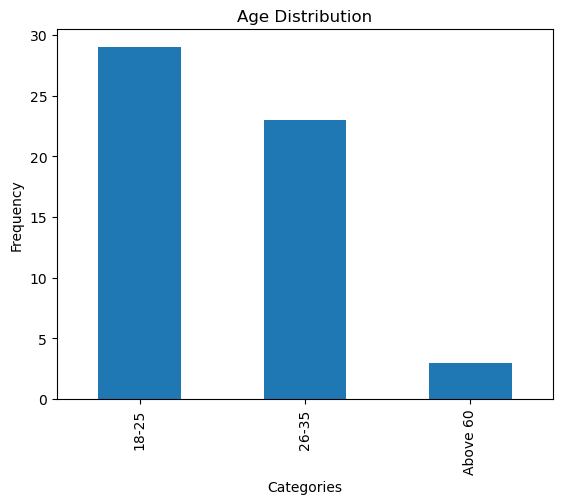

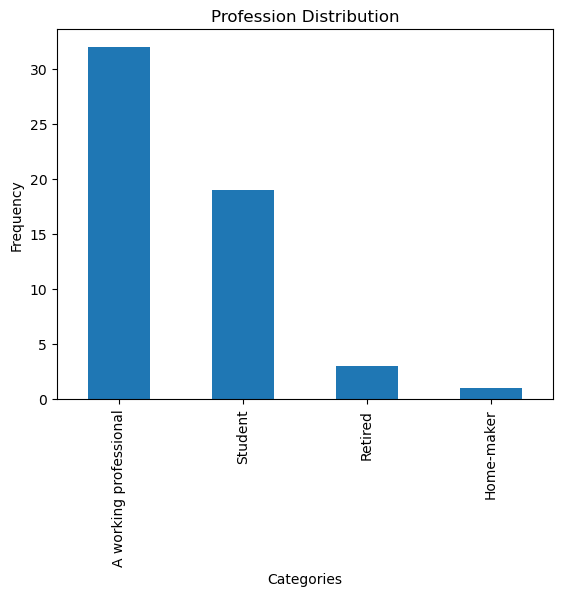

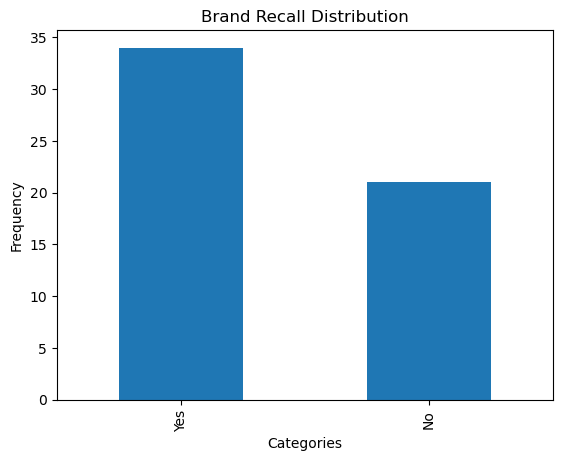

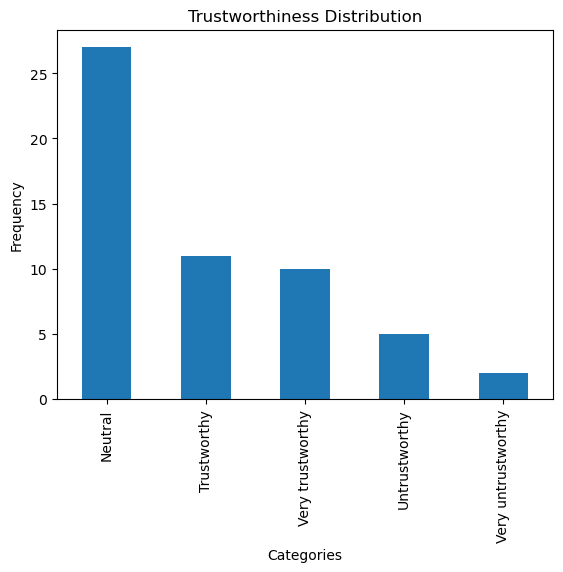

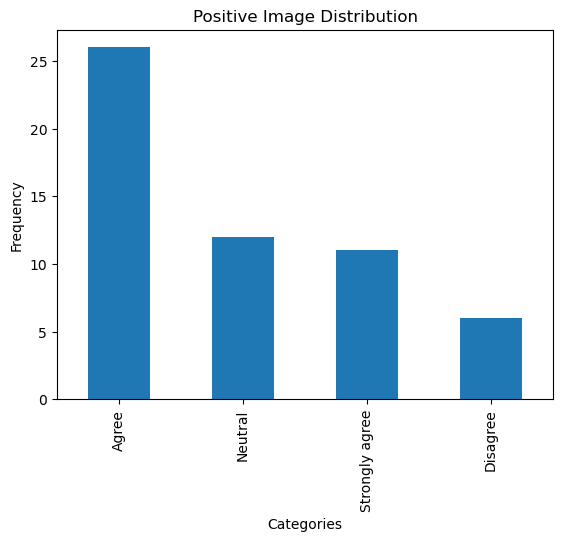

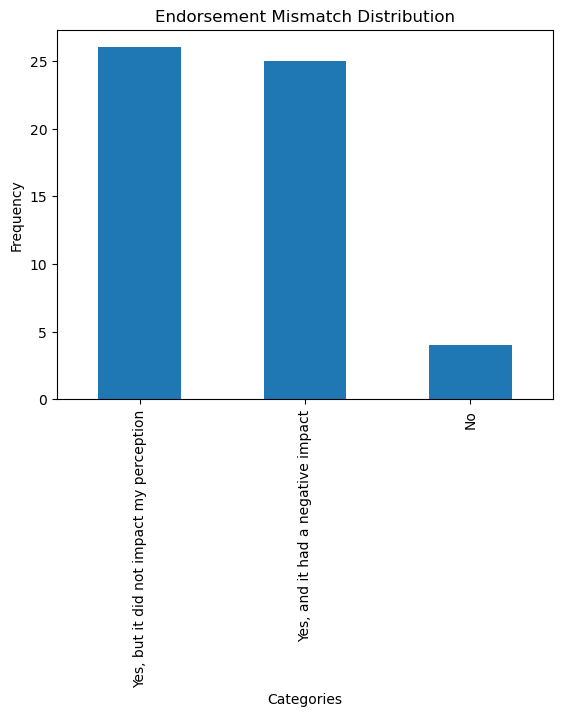

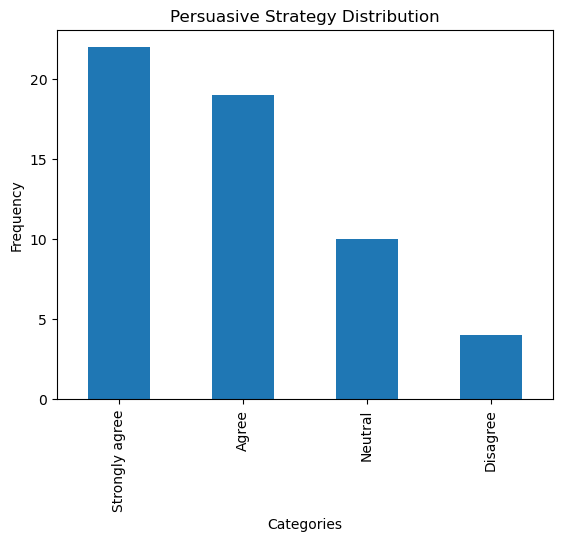

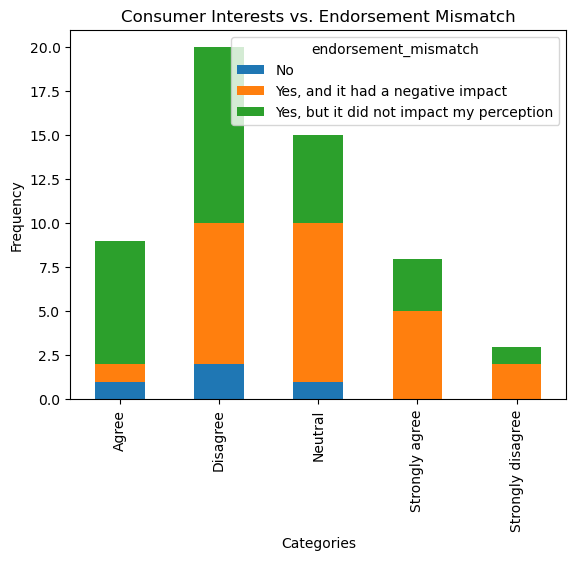

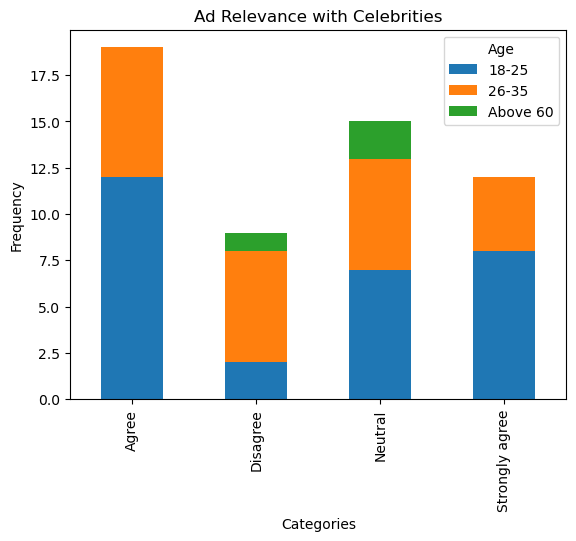

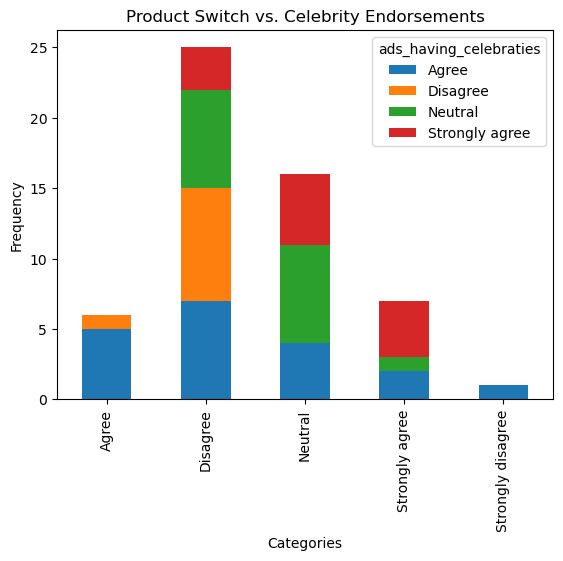

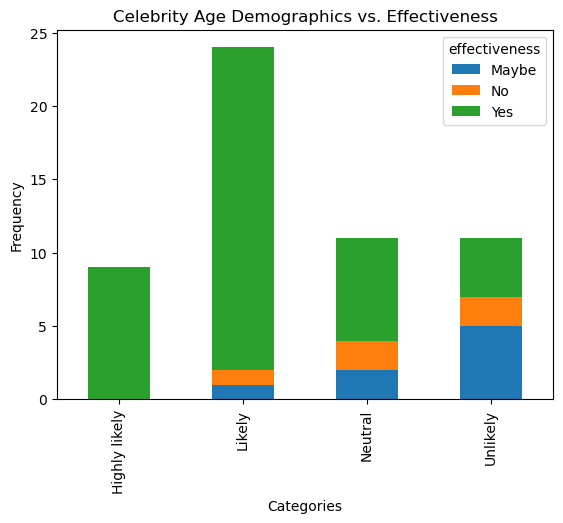

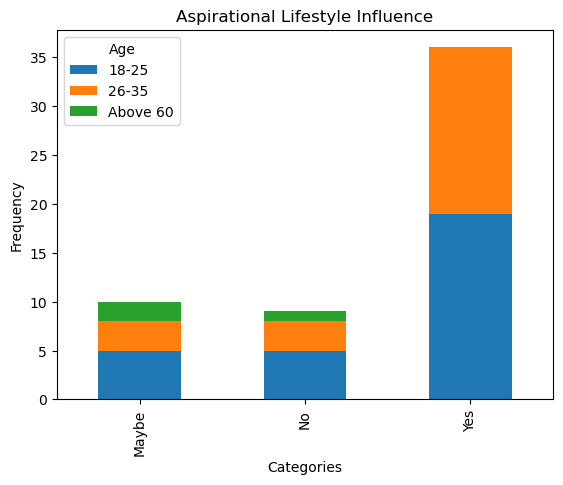

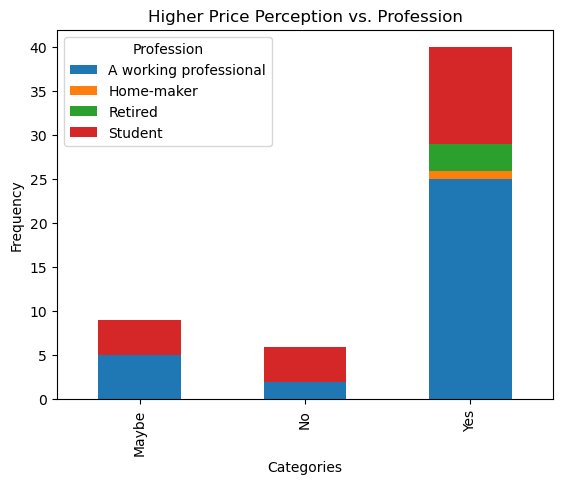

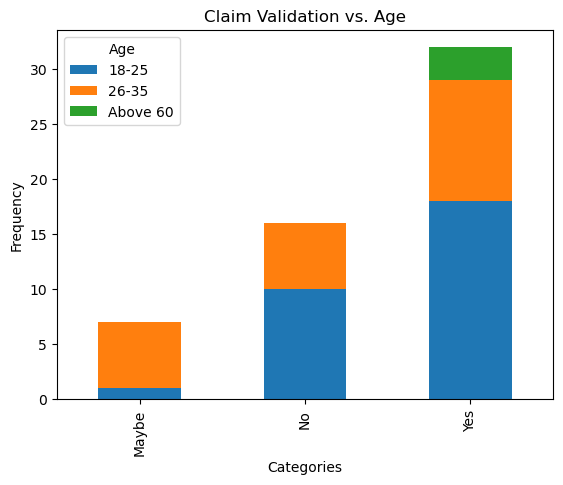

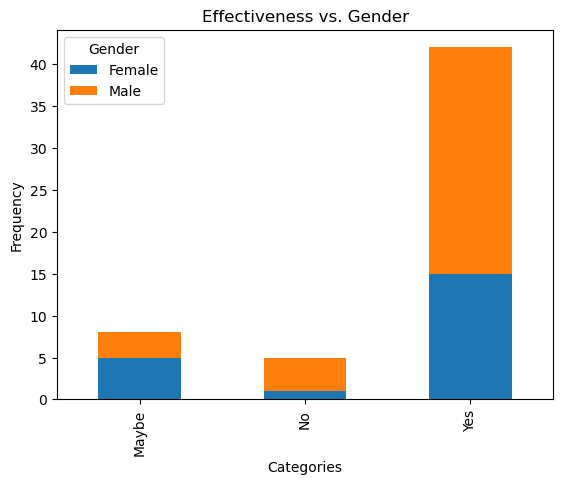

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'survey_data.csv'
df = pd.read_excel(r"A:\Semester 4\1.Dissertation\Analysis and Interpretation\Understanding Consumer Behavior  (Responses).xlsx")

# EDA Questions and Code
eda_questions = [
    ('Age Distribution', 'Age', 'bar'),
    ('Profession Distribution', 'Profession', 'bar'),
    ('Brand Recall Distribution', 'brand_recall', 'bar'),
    ('Trustworthiness Distribution', 'trustworthy', 'bar'),
    ('Positive Image Distribution', 'positive_image', 'bar'),
    ('Endorsement Mismatch Distribution', 'endorsement_mismatch', 'bar'),
    ('Persuasive Strategy Distribution', 'persuasive_market_strategy', 'bar'),
    ('Consumer Interests vs. Endorsement Mismatch', ['consumer_interests', 'endorsement_mismatch'], 'bar'),
    ('Ad Relevance with Celebrities', ['ads_having_celebraties', 'Age'], 'bar'),
    ('Product Switch vs. Celebrity Endorsements', ['product_switch', 'ads_having_celebraties'], 'bar'),
    ('Celebrity Age Demographics vs. Effectiveness', ['age_demograph_of_celebrity', 'effectiveness'], 'bar'),
    ('Aspirational Lifestyle Influence', ['aspirational_lifestyle', 'Age'], 'bar'),
    ('Higher Price Perception vs. Profession', ['higher_price', 'Profession'], 'bar'),
    ('Claim Validation vs. Age', ['claim_validate', 'Age'], 'bar'),
    ('Effectiveness vs. Gender', ['effectiveness', 'Gender'], 'bar'),
]

for question, columns, plot_type in eda_questions:
    if isinstance(columns, str):
        df[columns].value_counts().plot(kind=plot_type)
    elif isinstance(columns, list):
        df.groupby(columns).size().unstack().plot(kind=plot_type, stacked=True)

    plt.title(question)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()


In [2]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Display count of unique values for each column
print("\nCount of Unique Values:")
print(df.nunique())

# Display count of missing values for each column
print("\nCount of Missing Values:")
print(df.isnull().sum())

# Display count of unique values for categorical columns
print("\nUnique Values for Categorical Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}:\n{df[column].value_counts()}")

# Display count of unique values for non-categorical columns
print("\nUnique Values for Non-Categorical Columns:")
for column in df.select_dtypes(exclude=['object']).columns:
    print(f"\n{column}:\n{df[column].value_counts()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 26 columns):
 #   Column                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                       --------------  -----         
 0   Timestamp                                                                                                    55 non-null     datetime64[ns]
 1   I have understood the aim behind this research and give my informed consent to be a part of this research.   55 non-null     object        
 2   Name                                                                                                         55 non-null     object        
 3   Age                                                                                                          55 non-null     object        
 4   Gender  

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\1786845836.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


In [5]:
pip install associations


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame with non-numeric columns

# Loop through pairs of categorical columns
for column1 in df.select_dtypes(include=['object']).columns:
    for column2 in df.select_dtypes(include=['object']).columns:
        if column1 != column2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[column1], df[column2])
            
            # Chi-square test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            print(f"\nChi-square test between {column1} and {column2}:")
            print(f"Chi2: {chi2}")
            print(f"P-value: {p}")



Chi-square test between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Name:
Chi2: 0.0
P-value: 1.0

Chi-square test between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Age:
Chi2: 0.0
P-value: 1.0

Chi-square test between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Gender:
Chi2: 0.0
P-value: 1.0

Chi-square test between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Profession:
Chi2: 0.0
P-value: 1.0

Chi-square test between I have understood the aim behind this research and give my informed consent to be a part of this research.  and freq__:
Chi2: 0.0
P-value: 1.0

Chi-square test between I have understood the aim behind this research and give my informed consent to be a part of this research.  and brand_recall:
Chi2: 0.0


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame with non-numeric columns

# Define a function to calculate Cramer's V coefficient
def calculate_cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Loop through pairs of categorical columns
for column1 in df.select_dtypes(include=['object']).columns:
    for column2 in df.select_dtypes(include=['object']).columns:
        if column1 != column2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[column1], df[column2])
            
            # Cramer's V coefficient
            cramer_v = calculate_cramers_v(contingency_table.values)
            
            print(f"\nCramer's V coefficient between {column1} and {column2}:")
            print(f"Cramer's V: {cramer_v}")


C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\274


Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Name:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Age:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Gender:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and Profession:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and freq__:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and brand_recall:
Cra

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\274


Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and negative_endorsement:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and aspirational_lifestyle:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and ads_having_celebraties:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and product_switch:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my informed consent to be a part of this research.  and consumer_interests:
Cramer's V: nan

Cramer's V coefficient between I have understood the aim behind this research and give my inf

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between Age and disappointeed:
Cramer's V: 0.14120917103717978

Cramer's V coefficient between Age and positive_image:
Cramer's V: 0.25515448600896357

Cramer's V coefficient between Age and product_perception:
Cramer's V: 0.28277939206098357

Cramer's V coefficient between Age and endorsement_mismatch:
Cramer's V: 0.11525345253327374

Cramer's V coefficient between Age and personally_relate:
Cramer's V: 0.18447772957606712

Cramer's V coefficient between Age and higher_price:
Cramer's V: 0.17661465671016918

Cramer's V coefficient between Age and claim_validate:
Cramer's V: 0.2730952454088063

Cramer's V coefficient between Age and effectiveness:
Cramer's V: 0.32909419831024384

Cramer's V coefficient between Age and age_demograph_of_celebrity:
Cramer's V: 0.34164038999140367

Cramer's V coefficient between Age and negative_endorsement:
Cramer's V: 0.24988753092330263

Cramer's V coefficient between Age and aspirational_lifestyle:
Cramer's V: 0.2547456184367484

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between Gender and I have understood the aim behind this research and give my informed consent to be a part of this research. :
Cramer's V: nan

Cramer's V coefficient between Gender and Name:
Cramer's V: 0.9999999999999999

Cramer's V coefficient between Gender and Age:
Cramer's V: 0.06981628422874103

Cramer's V coefficient between Gender and Profession:
Cramer's V: 0.17423477591440492

Cramer's V coefficient between Gender and freq__:
Cramer's V: 0.1527830828380352

Cramer's V coefficient between Gender and brand_recall:
Cramer's V: 0.11694677871148457

Cramer's V coefficient between Gender and pur_influence:
Cramer's V: 0.23701272986109964

Cramer's V coefficient between Gender and try_product:
Cramer's V: 0.4582996733575517

Cramer's V coefficient between Gender and trustworthy:
Cramer's V: 0.3090685919711066

Cramer's V coefficient between Gender and disappointeed:
Cramer's V: 0.18164241469848452

Cramer's V coefficient between Gender and positive_image:
C

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between Profession and trustworthy:
Cramer's V: 0.31769102485948747

Cramer's V coefficient between Profession and disappointeed:
Cramer's V: 0.25733679002463683

Cramer's V coefficient between Profession and positive_image:
Cramer's V: 0.35575462025724436

Cramer's V coefficient between Profession and product_perception:
Cramer's V: 0.2422195911559142

Cramer's V coefficient between Profession and endorsement_mismatch:
Cramer's V: 0.29626555546034494

Cramer's V coefficient between Profession and personally_relate:
Cramer's V: 0.2876982110025429

Cramer's V coefficient between Profession and higher_price:
Cramer's V: 0.21100804944320148

Cramer's V coefficient between Profession and claim_validate:
Cramer's V: 0.21663349074856772

Cramer's V coefficient between Profession and effectiveness:
Cramer's V: 0.32143401032713925

Cramer's V coefficient between Profession and age_demograph_of_celebrity:
Cramer's V: 0.3217690997211409

Cramer's V coefficient between Pro

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between freq__ and personally_relate:
Cramer's V: 0.21649375527275125

Cramer's V coefficient between freq__ and higher_price:
Cramer's V: 0.2939198681424733

Cramer's V coefficient between freq__ and claim_validate:
Cramer's V: 0.2515374801020792

Cramer's V coefficient between freq__ and effectiveness:
Cramer's V: 0.38725292360397595

Cramer's V coefficient between freq__ and age_demograph_of_celebrity:
Cramer's V: 0.2750972595168002

Cramer's V coefficient between freq__ and negative_endorsement:
Cramer's V: 0.30633463580031084

Cramer's V coefficient between freq__ and aspirational_lifestyle:
Cramer's V: 0.2345028411162272

Cramer's V coefficient between freq__ and ads_having_celebraties:
Cramer's V: 0.23729734538300168

Cramer's V coefficient between freq__ and product_switch:
Cramer's V: 0.6125393254350493

Cramer's V coefficient between freq__ and consumer_interests:
Cramer's V: 0.2922684988514421

Cramer's V coefficient between freq__ and persuasive_mark

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between brand_recall and I have understood the aim behind this research and give my informed consent to be a part of this research. :
Cramer's V: nan

Cramer's V coefficient between brand_recall and Name:
Cramer's V: 0.9805532080603964

Cramer's V coefficient between brand_recall and Age:
Cramer's V: 0.16862372991534558

Cramer's V coefficient between brand_recall and Gender:
Cramer's V: 0.11694677871148457

Cramer's V coefficient between brand_recall and Profession:
Cramer's V: 0.11622076811768396

Cramer's V coefficient between brand_recall and freq__:
Cramer's V: 0.45322786711889923

Cramer's V coefficient between brand_recall and pur_influence:
Cramer's V: 0.6475957474388172

Cramer's V coefficient between brand_recall and try_product:
Cramer's V: 0.5669648736054599

Cramer's V coefficient between brand_recall and trustworthy:
Cramer's V: 0.43363369130437346

Cramer's V coefficient between brand_recall and disappointeed:
Cramer's V: 0.4484285088603487

Crame

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between pur_influence and Name:
Cramer's V: 0.9882117688026185

Cramer's V coefficient between pur_influence and Age:
Cramer's V: 0.3178828011427621

Cramer's V coefficient between pur_influence and Gender:
Cramer's V: 0.2370127298610996

Cramer's V coefficient between pur_influence and Profession:
Cramer's V: 0.22928931817792852

Cramer's V coefficient between pur_influence and freq__:
Cramer's V: 0.3826130864107681

Cramer's V coefficient between pur_influence and brand_recall:
Cramer's V: 0.6475957474388173

Cramer's V coefficient between pur_influence and try_product:
Cramer's V: 0.4940245760062442

Cramer's V coefficient between pur_influence and trustworthy:
Cramer's V: 0.3626088493556259

Cramer's V coefficient between pur_influence and disappointeed:
Cramer's V: 0.32388076059909315

Cramer's V coefficient between pur_influence and positive_image:
Cramer's V: 0.47633228439995123

Cramer's V coefficient between pur_influence and product_perception:
Cramer'

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between try_product and Age:
Cramer's V: 0.40693116594973733

Cramer's V coefficient between try_product and Gender:
Cramer's V: 0.4582996733575517

Cramer's V coefficient between try_product and Profession:
Cramer's V: 0.2684294506823189

Cramer's V coefficient between try_product and freq__:
Cramer's V: 0.24836443548210319

Cramer's V coefficient between try_product and brand_recall:
Cramer's V: 0.5669648736054599

Cramer's V coefficient between try_product and pur_influence:
Cramer's V: 0.4940245760062442

Cramer's V coefficient between try_product and trustworthy:
Cramer's V: 0.4556419135255089

Cramer's V coefficient between try_product and disappointeed:
Cramer's V: 0.32562047467672167

Cramer's V coefficient between try_product and positive_image:
Cramer's V: 0.44113358292153515

Cramer's V coefficient between try_product and product_perception:
Cramer's V: 0.45745479176653026

Cramer's V coefficient between try_product and endorsement_mismatch:
Cramer's 

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between trustworthy and Profession:
Cramer's V: 0.3176910248594875

Cramer's V coefficient between trustworthy and freq__:
Cramer's V: 0.18739619784248507

Cramer's V coefficient between trustworthy and brand_recall:
Cramer's V: 0.43363369130437346

Cramer's V coefficient between trustworthy and pur_influence:
Cramer's V: 0.3626088493556259

Cramer's V coefficient between trustworthy and try_product:
Cramer's V: 0.45564191352550887

Cramer's V coefficient between trustworthy and disappointeed:
Cramer's V: 0.2606016560586211

Cramer's V coefficient between trustworthy and positive_image:
Cramer's V: 0.4350859196544697

Cramer's V coefficient between trustworthy and product_perception:
Cramer's V: 0.38988303150916725

Cramer's V coefficient between trustworthy and endorsement_mismatch:
Cramer's V: 0.2506536391661745

Cramer's V coefficient between trustworthy and personally_relate:
Cramer's V: 0.3831671865384875

Cramer's V coefficient between trustworthy and high

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between product_perception and freq__:
Cramer's V: 0.24205633608990665

Cramer's V coefficient between product_perception and brand_recall:
Cramer's V: 0.42284337361184104

Cramer's V coefficient between product_perception and pur_influence:
Cramer's V: 0.5083501280778119

Cramer's V coefficient between product_perception and try_product:
Cramer's V: 0.4574547917665303

Cramer's V coefficient between product_perception and trustworthy:
Cramer's V: 0.3898830315091672

Cramer's V coefficient between product_perception and disappointeed:
Cramer's V: 0.2482648744495441

Cramer's V coefficient between product_perception and positive_image:
Cramer's V: 0.600407979410452

Cramer's V coefficient between product_perception and endorsement_mismatch:
Cramer's V: 0.2209422462782439

Cramer's V coefficient between product_perception and personally_relate:
Cramer's V: 0.43473755096090816

Cramer's V coefficient between product_perception and higher_price:
Cramer's V: 0.327299

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between personally_relate and negative_endorsement:
Cramer's V: 0.30668924214225585

Cramer's V coefficient between personally_relate and aspirational_lifestyle:
Cramer's V: 0.31406501122493763

Cramer's V coefficient between personally_relate and ads_having_celebraties:
Cramer's V: 0.3065457628561455

Cramer's V coefficient between personally_relate and product_switch:
Cramer's V: 0.3847425057556405

Cramer's V coefficient between personally_relate and consumer_interests:
Cramer's V: 0.34318376593624084

Cramer's V coefficient between personally_relate and persuasive_market_strategy:
Cramer's V: 0.35092064760867897

Cramer's V coefficient between higher_price and I have understood the aim behind this research and give my informed consent to be a part of this research. :
Cramer's V: nan

Cramer's V coefficient between higher_price and Name:
Cramer's V: 1.0

Cramer's V coefficient between higher_price and Age:
Cramer's V: 0.17661465671016918

Cramer's V coefficie

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between effectiveness and trustworthy:
Cramer's V: 0.23653408341090992

Cramer's V coefficient between effectiveness and disappointeed:
Cramer's V: 0.22068182118259358

Cramer's V coefficient between effectiveness and positive_image:
Cramer's V: 0.20124125725865366

Cramer's V coefficient between effectiveness and product_perception:
Cramer's V: 0.27236810034614517

Cramer's V coefficient between effectiveness and endorsement_mismatch:
Cramer's V: 0.1624996477877276

Cramer's V coefficient between effectiveness and personally_relate:
Cramer's V: 0.12328861518930305

Cramer's V coefficient between effectiveness and higher_price:
Cramer's V: 0.12672748122390223

Cramer's V coefficient between effectiveness and claim_validate:
Cramer's V: 0.16002663734473693

Cramer's V coefficient between effectiveness and age_demograph_of_celebrity:
Cramer's V: 0.4022926495747541

Cramer's V coefficient between effectiveness and negative_endorsement:
Cramer's V: 0.299573108971829

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between negative_endorsement and consumer_interests:
Cramer's V: 0.3591656999213594

Cramer's V coefficient between negative_endorsement and persuasive_market_strategy:
Cramer's V: 0.37604400129385246

Cramer's V coefficient between aspirational_lifestyle and I have understood the aim behind this research and give my informed consent to be a part of this research. :
Cramer's V: nan

Cramer's V coefficient between aspirational_lifestyle and Name:
Cramer's V: 0.9732534213770956

Cramer's V coefficient between aspirational_lifestyle and Age:
Cramer's V: 0.2547456184367484

Cramer's V coefficient between aspirational_lifestyle and Gender:
Cramer's V: 0.04497812173486284

Cramer's V coefficient between aspirational_lifestyle and Profession:
Cramer's V: 0.34807935143123264

Cramer's V coefficient between aspirational_lifestyle and freq__:
Cramer's V: 0.2345028411162272

Cramer's V coefficient between aspirational_lifestyle and brand_recall:
Cramer's V: 0.1776274457753

C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
C:\Users\balas\AppData\Local\Temp\ipykernel_6284\2745978983.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Cramer's V coefficient between product_switch and effectiveness:
Cramer's V: 0.3649617326878677

Cramer's V coefficient between product_switch and age_demograph_of_celebrity:
Cramer's V: 0.38681710813808184

Cramer's V coefficient between product_switch and negative_endorsement:
Cramer's V: 0.3166218639985318

Cramer's V coefficient between product_switch and aspirational_lifestyle:
Cramer's V: 0.22889991690184588

Cramer's V coefficient between product_switch and ads_having_celebraties:
Cramer's V: 0.389785888168179

Cramer's V coefficient between product_switch and consumer_interests:
Cramer's V: 0.4519432798201597

Cramer's V coefficient between product_switch and persuasive_market_strategy:
Cramer's V: 0.3004704736013003

Cramer's V coefficient between consumer_interests and I have understood the aim behind this research and give my informed consent to be a part of this research. :
Cramer's V: nan

Cramer's V coefficient between consumer_interests and Name:
Cramer's V: 0.992681553